# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2023-10-17 00:55:24--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.05s   

2023-10-17 00:55:24 (4.84 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



In [4]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  centroids = data.T[:, :5].T
  classes = np.random.choice(5, len(data))

  for _ in range(num_iterations):
    # distances from data points to centroids
    distance = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    # each data point to the closest centroid
    classes = np.argmin(distance, axis=1)
    # update the centroids
    updated_centroids = np.array([data[classes == i].mean(axis=0) for i in range(len(centroids))])
    # if centroid did not update
    if np.array_equal(centroids, updated_centroids):
      break

    centroids = updated_centroids

  return centroids, classes

In [5]:
def plot_data(data, centroids, classes):
  for cluster_label in np.unique(classes):
    plt.scatter(data[classes == cluster_label, 0], data[classes == cluster_label, 1], label=f'Cluster {cluster_label}')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')

  plt.legend()
  plt.title('K-means Clustering Results')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.show()
  return

Centroids:
[[ 10.28915724  -1.75417494]
 [-33.16389126   2.64171963]
 [ -2.87105702  -2.25294435]
 [ 26.6302707   -1.07663852]
 [-16.37778287  -0.09633464]]
Classes:
[4 1 4 ... 0 1 1]


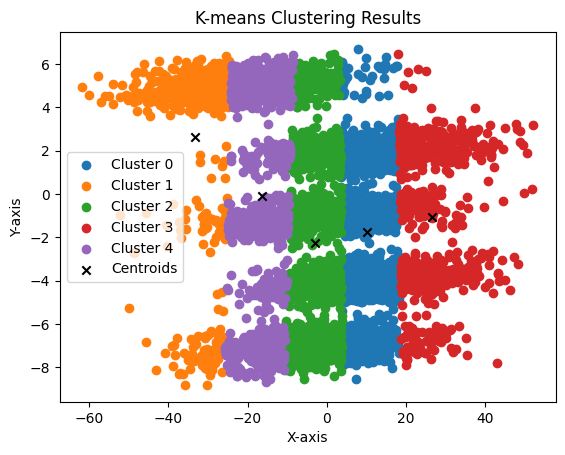

In [16]:
# Set the random seed for consistency
np.random.seed(seed=27)

use_P = False #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster(all_data, centroids_, P = P_ )
print("Centroids:")
print(centroids_)
print("Classes:")
print(classes_)
plot_data(all_data, centroids_, classes_)


# Mahalanobis Distance with specialized covariance

## 5. Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors. What do you notice? You may want to pre- compute P −1 so that you aren’t calculating an inverse every single loop of the the k-Means algorithm.

In [21]:
def inverse_matrix(P):
# P = np.array([[10, 0.5], [-10, 0.25]])
 return np.linalg.inv(P.T.dot(P))

use_P = True

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

print("Original Matrix: ")
print(P_)
print("Transpose Matrix:")
print(P_.T)
print("Transpose matrix dot P:")
print(P_.T.dot(P_))
print("Inverse Matrix: ")
print(inverse_matrix(P_))

Original Matrix: 
[[ 10.     0.5 ]
 [-10.     0.25]]
Transpose Matrix:
[[ 10.   -10.  ]
 [  0.5    0.25]]
Transpose matrix dot P:
[[200.       2.5   ]
 [  2.5      0.3125]]
Inverse Matrix: 
[[ 0.00555556 -0.04444444]
 [-0.04444444  3.55555556]]


In [22]:
def mahalanobis_distance(x, y, P):
  delta = x - y
  return delta.T.dot(inverse_matrix(P_)).dot(delta)

In [24]:
def kmeans_mahalanobis(data, centroids, P, num_iterations=100):
  classes = np.zeros(len(data), dtype=int)

  for _ in range(num_iterations):
    for i in range(len(data)):
      distances = [mahalanobis_distance(data[i], c, P) for c in centroids]
      classes[i] = np.argmin(distances)
    updated_centroids = np.array([data[classes == i].mean(axis=0) for i in range(len(centroids))])

    if np.array_equal(centroids, updated_centroids):
      break

    centroids = updated_centroids
  return centroids, classes

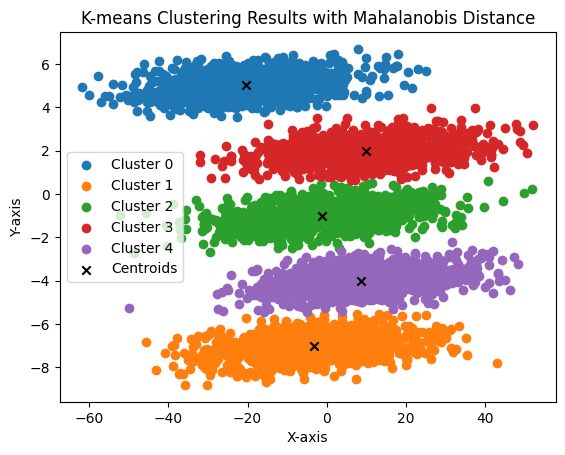

In [25]:
initial_centroids = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

use_P = True

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

centroids, classes = kmeans_mahalanobis(all_data, initial_centroids, P=P_)

for label in np.unique(classes):
  plt.scatter(all_data[classes == label, 0], all_data[classes == label, 1], label=f'Cluster {label}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')
plt.legend()
plt.title('K-means Clustering Results with Mahalanobis Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## 6. Calculate and print out the first principle component of the aggregate data.

In [11]:
# Calculate the mean of the data
mean_data = np.mean(all_data, axis=0)

# Center the data by subtracting the mean
centered_data = all_data - mean_data

# Compute the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar=False)

# Perform eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# The first principal component is the eigenvector corresponding to the largest eigenvalue
first_principal_component = eigenvectors[:, 0]

# Print the first principal component
print("First Principal Component of Aggregate Data:")
print(first_principal_component)


First Principal Component of Aggregate Data:
[ 0.99838317 -0.05684225]


## 7. Calculate and print out the first principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [12]:
cluster_principal_components = []

for cluster_label in np.unique(classes):
    # Extract data points belonging to the current cluster
    cluster_data = all_data[classes == cluster_label]

    # Calculate the mean of the cluster data
    mean_cluster_data = np.mean(cluster_data, axis=0)

    # Center the cluster data by subtracting the mean
    centered_cluster_data = cluster_data - mean_cluster_data

    # Compute the covariance matrix for the cluster data
    covariance_matrix_cluster = np.cov(centered_cluster_data, rowvar=False)

    # Perform eigendecomposition of the cluster's covariance matrix
    eigenvalues_cluster, eigenvectors_cluster = np.linalg.eig(covariance_matrix_cluster)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices_cluster = np.argsort(eigenvalues_cluster)[::-1]
    eigenvalues_cluster = eigenvalues_cluster[sorted_indices_cluster]
    eigenvectors_cluster = eigenvectors_cluster[:, sorted_indices_cluster]

    # The first principal component of the cluster is the eigenvector corresponding to the largest eigenvalue
    first_principal_component_cluster = eigenvectors_cluster[:, 0]

    cluster_principal_components.append(first_principal_component_cluster)

    # Print the first principal component of the current cluster
    print(f"First Principal Component of Cluster {cluster_label}:")
    print(first_principal_component_cluster)

# Check if the first principal components are the same as the aggregate data
for i, cluster_pc in enumerate(cluster_principal_components):
    if np.allclose(cluster_pc, first_principal_component):
        print(f"First Principal Component of Cluster {i} is the same as the Aggregate Data.")

# Check if the first principal components of clusters are the same as each other
for i in range(len(cluster_principal_components) - 1):
    for j in range(i + 1, len(cluster_principal_components)):
        if np.allclose(cluster_principal_components[i], cluster_principal_components[j]):
            print(f"First Principal Component of Cluster {i} is the same as Cluster {j}.")


First Principal Component of Cluster 0:
[0.99993527 0.01137789]
First Principal Component of Cluster 1:
[0.99992533 0.01222027]
First Principal Component of Cluster 2:
[0.99990986 0.01342629]
First Principal Component of Cluster 3:
[0.99993306 0.01157047]
First Principal Component of Cluster 4:
[0.99989374 0.01457781]


They are not the same as each other but similar.